# Exploring Catalyst Designs Using Cando
#### We are going to explore two catalyst designs to look for macromolecules that could wrap around a Zr-O metal cluster and leave open coordination sites that could bind and hydrolyze reactive phosphate esters.

## Notes

#### 1. Some/all of the interactive display windows are clipped and display a scroll-bar. This isn't good for interactive viewing.Solution: Right click on the window and select "Disable Scrolling For Outputs".
#### 2. To replay the calculations in this notebook: Select this cell and hit Shift-Enter to evaluate it. You can also evaluate all cells by going to Run > Run all cells. Some cells may take seconds to minutes to evaluate. Wait until output appears before moving on to the next cell.


<div class="alert alert-block alert-info">
    <strong>Step 1:</b> <strong color='black'>Loading in a ChemDraw file</strong></div>

<div class="alert alert-block alert-success">
    </b> <font color='black'>We will use the saved chemdraw file of the X-Ray crystal structure of the Zr-O cluster. We will then build a three-dimensional structure of the catalyst design and wrap it around a Zr-O cluster to see if the resulting geometry is chemically reasonable.
    
Use the function `jupyter:png-file` to call a saved chemdraw file.</font></div>

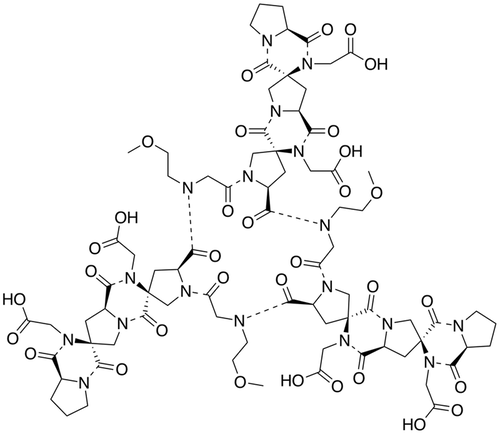

In [1]:
(jupyter:png-file "data/cat-design/trimer.png")

Above is the loaded image of the 2D X-ray crystal structure of the Zr-O cluster. It is surrounded by benzoic acid groups.

This chemdraw structure for a designed molecule presents six carboxylic acids that could displace benzoic acids from a crystal structure of a Zr-O cluster.

Note: It turns out that this is a poor design - but suggests some ideas on how to make a better one. 


<div class="alert alert-block alert-info">
    <strong>Step 2:</b> <strong color='black'>Load in the 3D molecule of the cluster</strong></div>

<div class="alert alert-block alert-success">
    
   Use the command `defparameter` to assign the loaded molecule to an arbitrary variable name.  </b> <font color='black'></font></div>

In [ ]:
(defparameter zr (load-mol2 "data/cat-design/renamed-zrcluster.mol2"))

<div class="alert alert-block alert-success">
    
   Set the default display pane. This will cause the `show` command to use the sidebar in a tab named "Aggregate." Then align the aggregate's axes to the principle axes and show the result. </b> <font color='black'></font></div>

In [ ]:
defaultPane "Aggregate";
alignAxes zr;
show zr

You can view the structure and manipulate it using your mouse.

- Rotate the molecule by dragging the left mouse button (or trackpad) within the view below.
- Zoom (two button drag scroll or scroll wheel).
- Pick atoms (hover over an atom and left button click).

<div class="alert alert-block alert-info">
    <strong>Step 3:</b> <strong color='black'>Load in the 3D coordinates of a trimer</strong></div>

<div class="alert alert-block alert-success">
    
   Use the command `defparameter` to load in a chemdraw aggregate and assign it to a variable. </b> <font color='black'></font></div>

In [ ]:
(defparameter agg (load-chem-draw-aggregate "data/cat-design/trimer.cdxml"))
(chem:set-name agg :Trimer)

<div class="alert alert-block alert-success">
    
  Use the chem commands `fill-in-implicit-hydrogens` and `build-unbuilt-hydrogens` to add the implicit and unbuilt hydrogens to the aggregate.

The output of this cell will give you two values: the number of implicit and number of unbuilt hydrogens respectively.</b> <font color='black'></font></div>

In [ ]:
(chem:fill-in-implicit-hydrogens agg)
(build-unbuilt-hydrogens agg)

<div class="alert alert-block alert-success">
    
Use the command `show` to visualize the aggregate.

Note: the structure has successfully loaded into Cando if the result has no depth.</b> <font color='black'></font></div>

In [ ]:
alignAxes agg;
show agg

<div class="alert alert-block alert-success">
    
Use the commands `defparameter` and `sterocenters-sorted-by-name` to sort all all the aggregate's stereocenters and assign them to a variable.</b> <font color='black'></font></div>

In [ ]:
(defparameter stereocenters (stereocenters-sorted-by-name agg))

<div class="alert alert-block alert-success">
    
Use the command `set-all-stereocenters-to` to assign all the stereocenters to the S orientation.</b> <font color='black'></font></div>

In [ ]:
(set-all-stereocenters-to stereocenters :S :show t)

<div class="alert alert-block alert-success">
    
Use the command `jostle` to randomly displace all the atoms. This will assist the energy minimization we do in later steps</b> <font color='black'></font></div>

In [ ]:
(jostle agg 20)

The atoms are randomly jostled in space to break them out of "flatland". They now have depth.

In [ ]:
show agg

<div class="alert alert-block alert-info">
    <strong>Step 4:</b> <strong color='black'>Construct a chemically reasonable molecule by minimizing conformation energy</strong></div>

This does a few things in sequence:

1. Cando automatically assigns atom types
2. Cando assigns Generalized Amber Force Field (GAFF) parameters
3. Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.



<div class="alert alert-block alert-success">
    
 Call for a generalized force field using `easy-gaff`. You can ignore the warnings below.
</b> <font color='black'></font></daiv>

In [ ]:
(easy-gaff)

<div class="alert alert-block alert-success">
    
 Build the aggregate's unbuilt hydrogens using the command `build-unbuilt-hydrogens`.
</b> <font color='black'></font></div>

In [ ]:
(build-unbuilt-hydrogens agg)

<div class="alert alert-block alert-success">
    
Use the energy function `minimize` to reduce strain on the molecule.
</b> <font color='black'></font></daiv>

In [ ]:
(energy:minimize agg
                 :restraints-on t
                 :max-sd-steps 5000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

<div class="alert alert-block alert-success">
    
Use the function `show` to visualize the chemically reasonable three-dimensional structure of the molecule.
</b> <font color='black'></font></daiv>

In [ ]:
alignAxes agg;
show agg :representation :licorice;
show zr :representation :line :append t

<div class="alert alert-block alert-success">
    
You can select pairs of carboxylic acid carbons on the ligand and on the benzoic acids of the Zr-O cluster multiple times to build a mapping of atoms on the ligand to the cluster.  It's a bit tricky and takes a couple of tries to get it right.  The function below pulls out the mapping.
</b> <font color='black'></font></daiv>

In [ ]:
(defparameter named-map '((:C_350 . :C_2) (:C_354 . :C_1)
                          (:C_255 . :C_7) (:C_259 . :C_8)
                          (:C_185 . :C_3) (:C_196 . :C_4)))

In [ ]:
show (cando-widgets::visualize-named-atom-map agg zr named-map) :append t

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

<div class="alert alert-block alert-info">
    <strong>Step 5:</b> <strong color='black'>Constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.</strong></div>

In [ ]:
(clear-all-atom-restraints agg)

In [ ]:
(cando-widgets::anchor-named-atom-map agg zr named-map)

In [ ]:
(set-all-stereocenters-to stereocenters :S :show t)

In [ ]:
(energy:minimize agg
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

In [ ]:
show agg :representation :licorice;
show zr :representation :line :append t

### It turns out that the structure above is a bad design - with lots of bad geometry.
# We can rule this design out and move on to another design with a larger macrocycle to better envelop the Zr-O cluster.

### Overlay of the trial above on the Zr-O cluster and looking at it closely can help us learn what is wrong with the design.

In [ ]:
(defparameter *overlay-view* (show *zr*))
(defparameter *cagg* (make-instance 'cando-structure :matter *agg*))
(nglv::clear-representations *overlay-view*)
(nglv::add-representation *overlay-view* "hyperball")
(nglv::add-structure *overlay-view* *cagg*)
*overlay-view*

In [ ]:
(jupyter:png-file "data/cat-design/trial-catalyst2.png")

In [ ]:
(defparameter *agg2* (load-chem-draw-aggregate "data/cat-design/trial-catalyst2.cdxml"))

In [ ]:
(chem:fill-in-implicit-hydrogens *agg2*)
(build-unbuilt-hydrogens *agg2*)

In [ ]:
(show *agg2*)

### The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [ ]:
(defparameter *stereocenters2* (stereocenters-sorted-by-name *agg2*))

In [ ]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

In [ ]:
(jostle *agg2* 20)

In [ ]:
(show *agg2*)

In [ ]:
(energy:minimize *agg2* 
                 :restraints-on t
                 :max-sd-steps 2000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

In [ ]:
(show *agg2*)

In [ ]:
(defparameter *design-view2* (show *zr*))
(defparameter *cagg2* (make-instance 'cando-structure :matter *agg2*))
(nglv::add-structure *design-view2* *cagg2*)
*design-view2*

In [ ]:
(defparameter *named-map2* '((:C_452 . :C_8) (:C_458 . :C_7) 
                    (:C_198 . :C_5) (:C_219 . :C_6)
                    (:C_305 . :C_4) (:C_311 . :C_3)))

In [ ]:
(cando-widgets:cartoon-atom-map *design-view2* *named-map2* *agg2* *zr*)

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [ ]:
(clear-all-atom-restraints *agg2*)

In [ ]:
(cando-widgets:anchor-named-atom-map *named-map2* *agg2* *zr*)

In [ ]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

In [ ]:
(energy:minimize *agg2* 
                 :restraints-on t
                 :max-sd-steps 2000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

In [ ]:
(show *agg2*)

### This may be a better design.
### It's going to take more work to establish this.
### A build-tree will be constructed and ligands will be restrained to mimic the benzoic acids from the Zr-O cluster.
### 1) Rotatable bonds will be twisted.
### 2) Stereocenters will be flipped.
### 3) Functional groups will be varied.
### While scoring the conformational energy to find an optimal design.

## That's it for now - anything more sophisticated requires setting up more designs and running more sophisticated calculations on super-computers.
## This user interface can drive 100,000s of copies of Cando running on large super-computers.

edited by Ava Dremann